<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FPD%EF%BC%88%E3%83%87%E3%83%95%E3%82%A9%E3%83%AB%E3%83%88%E3%81%AE%E7%A2%BA%E7%8E%87%EF%BC%89%E3%81%AE%E7%AE%97%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

In [68]:
print(df)

     Default          CI    GDP  Interest_rate  Unemployment_rate_measured
0   0.033419  104.225000  0.386       0.327464                         5.4
1   0.015027  103.208333  0.042       0.092707                         5.3
2   0.008547  108.425000  1.535       0.023512                         4.7
3   0.008119  116.500000  2.186       0.021241                         4.4
4   0.006452  118.825000  1.804       0.023886                         4.1
5   0.010000  123.625000  1.372       0.032943                         3.9
6   0.006297  124.658333  1.484       0.422230                         4.0
7   0.016949  116.158333 -1.224       0.689082                         5.1
8   0.019531   90.525000 -5.693       0.646063                         5.1
9   0.002096  106.950000  4.098       0.222313                         4.6
10  0.007194  108.108333  0.024       0.128445                         4.3
11  0.003850  110.608333  1.375       0.135735                         4.0
12  0.002841  114.441667 

In [69]:
#データ数を20倍にする
import pandas as pd
import numpy as np

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

# データ拡張
augmented_data = pd.concat([df.copy() + np.random.normal(0, 0.01, size=(df.shape[0], df.shape[1])) for _ in range(19)], ignore_index=True)

# 各列に対してランダムなノイズを追加
for column in df.columns:
    if df[column].dtype == 'object':
        augmented_data[column] = augmented_data[column].astype(float)  # floatに変換
    augmented_data[column] += np.random.normal(0, 0.00001, size=augmented_data.shape[0])

# 拡張後のデータの確認
print(augmented_data.head())


    Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0  0.025941  104.238534  0.393482       0.315349                    5.412744
1  0.013384  103.200535  0.040110       0.092034                    5.301773
2  0.001818  108.419575  1.538200       0.016362                    4.703591
3  0.010790  116.499598  2.190126       0.018992                    4.400092
4 -0.017231  118.828278  1.806727       0.034039                    4.118059


In [70]:
print(augmented_data.head(100))

     Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0   0.025941  104.238534  0.393482       0.315349                    5.412744
1   0.013384  103.200535  0.040110       0.092034                    5.301773
2   0.001818  108.419575  1.538200       0.016362                    4.703591
3   0.010790  116.499598  2.190126       0.018992                    4.400092
4  -0.017231  118.828278  1.806727       0.034039                    4.118059
..       ...         ...       ...            ...                         ...
95 -0.003172  117.072842  0.744672      -0.001900                    2.786364
96 -0.009830  121.675998  1.683889      -0.225348                    2.409567
97 -0.005955  122.261578  0.634383      -0.188729                    2.404596
98  0.023391  116.974963 -0.405015      -0.137752                    2.796393
99  0.009519   99.981125 -4.287280      -0.197337                    2.793733

[100 rows x 5 columns]


In [71]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = augmented_data
print(df)

      Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0    0.025941  104.238534  0.393482       0.315349                    5.412744
1    0.013384  103.200535  0.040110       0.092034                    5.301773
2    0.001818  108.419575  1.538200       0.016362                    4.703591
3    0.010790  116.499598  2.190126       0.018992                    4.400092
4   -0.017231  118.828278  1.806727       0.034039                    4.118059
..        ...         ...       ...            ...                         ...
375 -0.006408  117.067850  0.747027      -0.003816                    2.797458
376 -0.005021  121.687352  1.665534      -0.232039                    2.397614
377  0.006273  122.263500  0.641229      -0.185495                    2.400813
378  0.037597  116.961232 -0.401061      -0.122522                    2.808782
379  0.017501   99.989162 -4.271026      -0.195011                    2.810134

[380 rows x 5 columns]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 4
[LightGBM] [Info] Start training from score 0.008300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[ 0.00781248  0.00590582  0.00439986  0.01085256  0.00940541 -0.00117494
 -0.00342842  0.01328724 -0.00284124 -0.00123915  0.00284704  0.01332371
  0.00016415  0.00985683  0.00650488  0.00645633 -0.00174134 -0.00035842
  0.03023365]


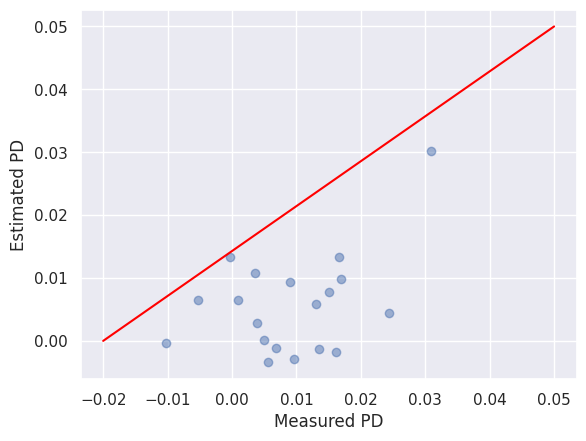

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

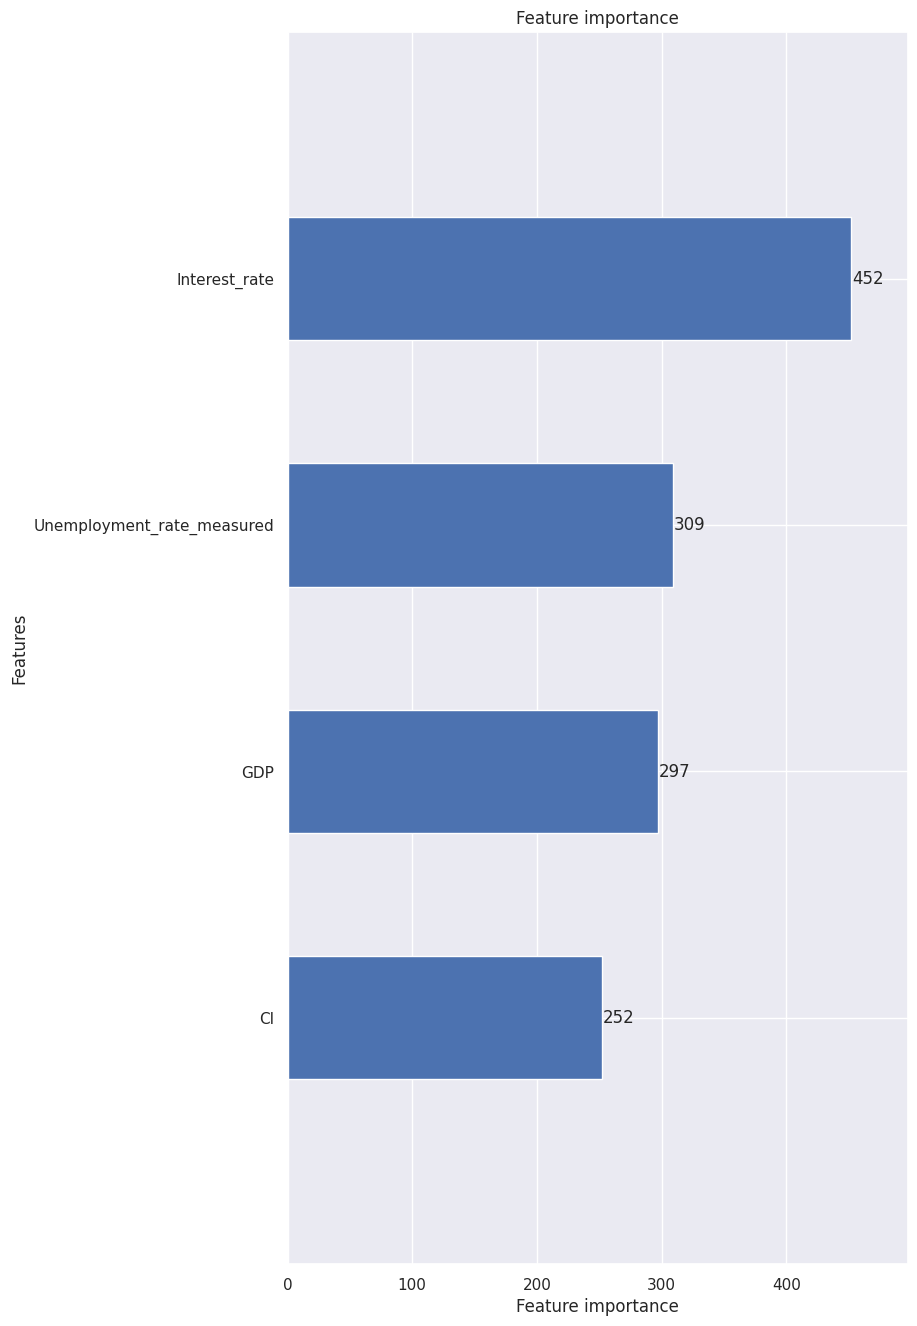

In [73]:
#予測ターゲットの格納（Default：A列）
target_df = df[["Default"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:5]

#モデル学習のための、訓練データとテストデータを19:1で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.05)

#lightで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

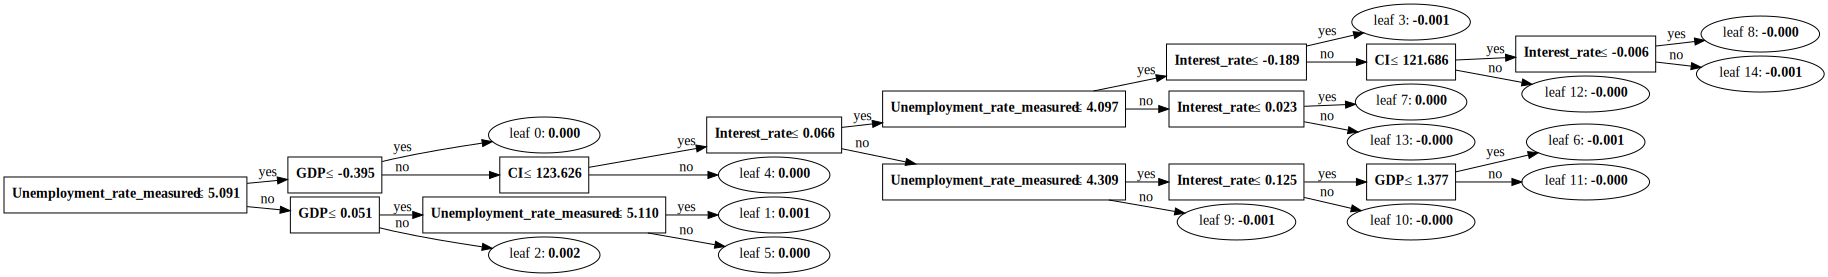

In [74]:
# 決定木の分岐の可視化
lgb.create_tree_digraph(model, 1)

In [65]:
#これなしでは回る
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# 実際の価格と予測値の対応する点
#x = np.array(pred).reshape(-1, 1)
#y = np.array(y_test).reshape(-1, 1)


# 線形回帰モデルの作成
#model2 = LinearRegression()

# モデルの学習
#model2.fit(x, y)

# 傾きと切片の取得
#slope = model2.coef_[0][0]
#intercept = model2.intercept_[0]

# 予測値を使って回帰直線を描写
#plt.scatter(x, y, alpha=0.5)
#plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Regression Line')
#plt.xlabel('予測値')
#plt.ylabel('実際の価格')
#plt.legend()
#plt.show()

#print(f"傾き: {slope}")
#print(f"切片: {intercept}")


ValueError: ignored

In [49]:
#アドオン
pred2 = pred-intercept
pred3 = pred2/slope
pred = pred3

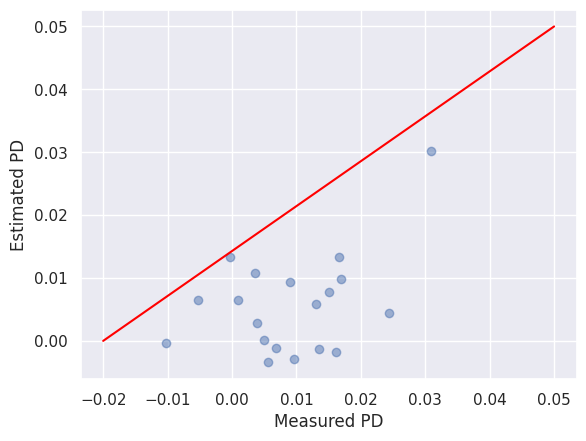

In [75]:
#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()


In [76]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred = model.predict([[104.225,0.386,0.327,5.4]])
print(pred)


#アドオン
pred2 = pred-intercept
pred3 = pred2/slope
pred = pred3

[0.03201137]


In [ ]:
#アドオン？？
pred2 = pred-intercept
pred3 = pred2/slope
pred = pred3
